In [62]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [39]:
IMAGE_SIZE=128
BATCH_SIZE=32
CHANNELS=3 
EPOCH=30

In [44]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantTomato",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5207 files belonging to 10 classes.


In [46]:
class_names=dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [47]:
len(dataset)

163

In [48]:
for image_batch,lable_batch in dataset.take(1):
    print(image_batch[0].shape)

(128, 128, 3)


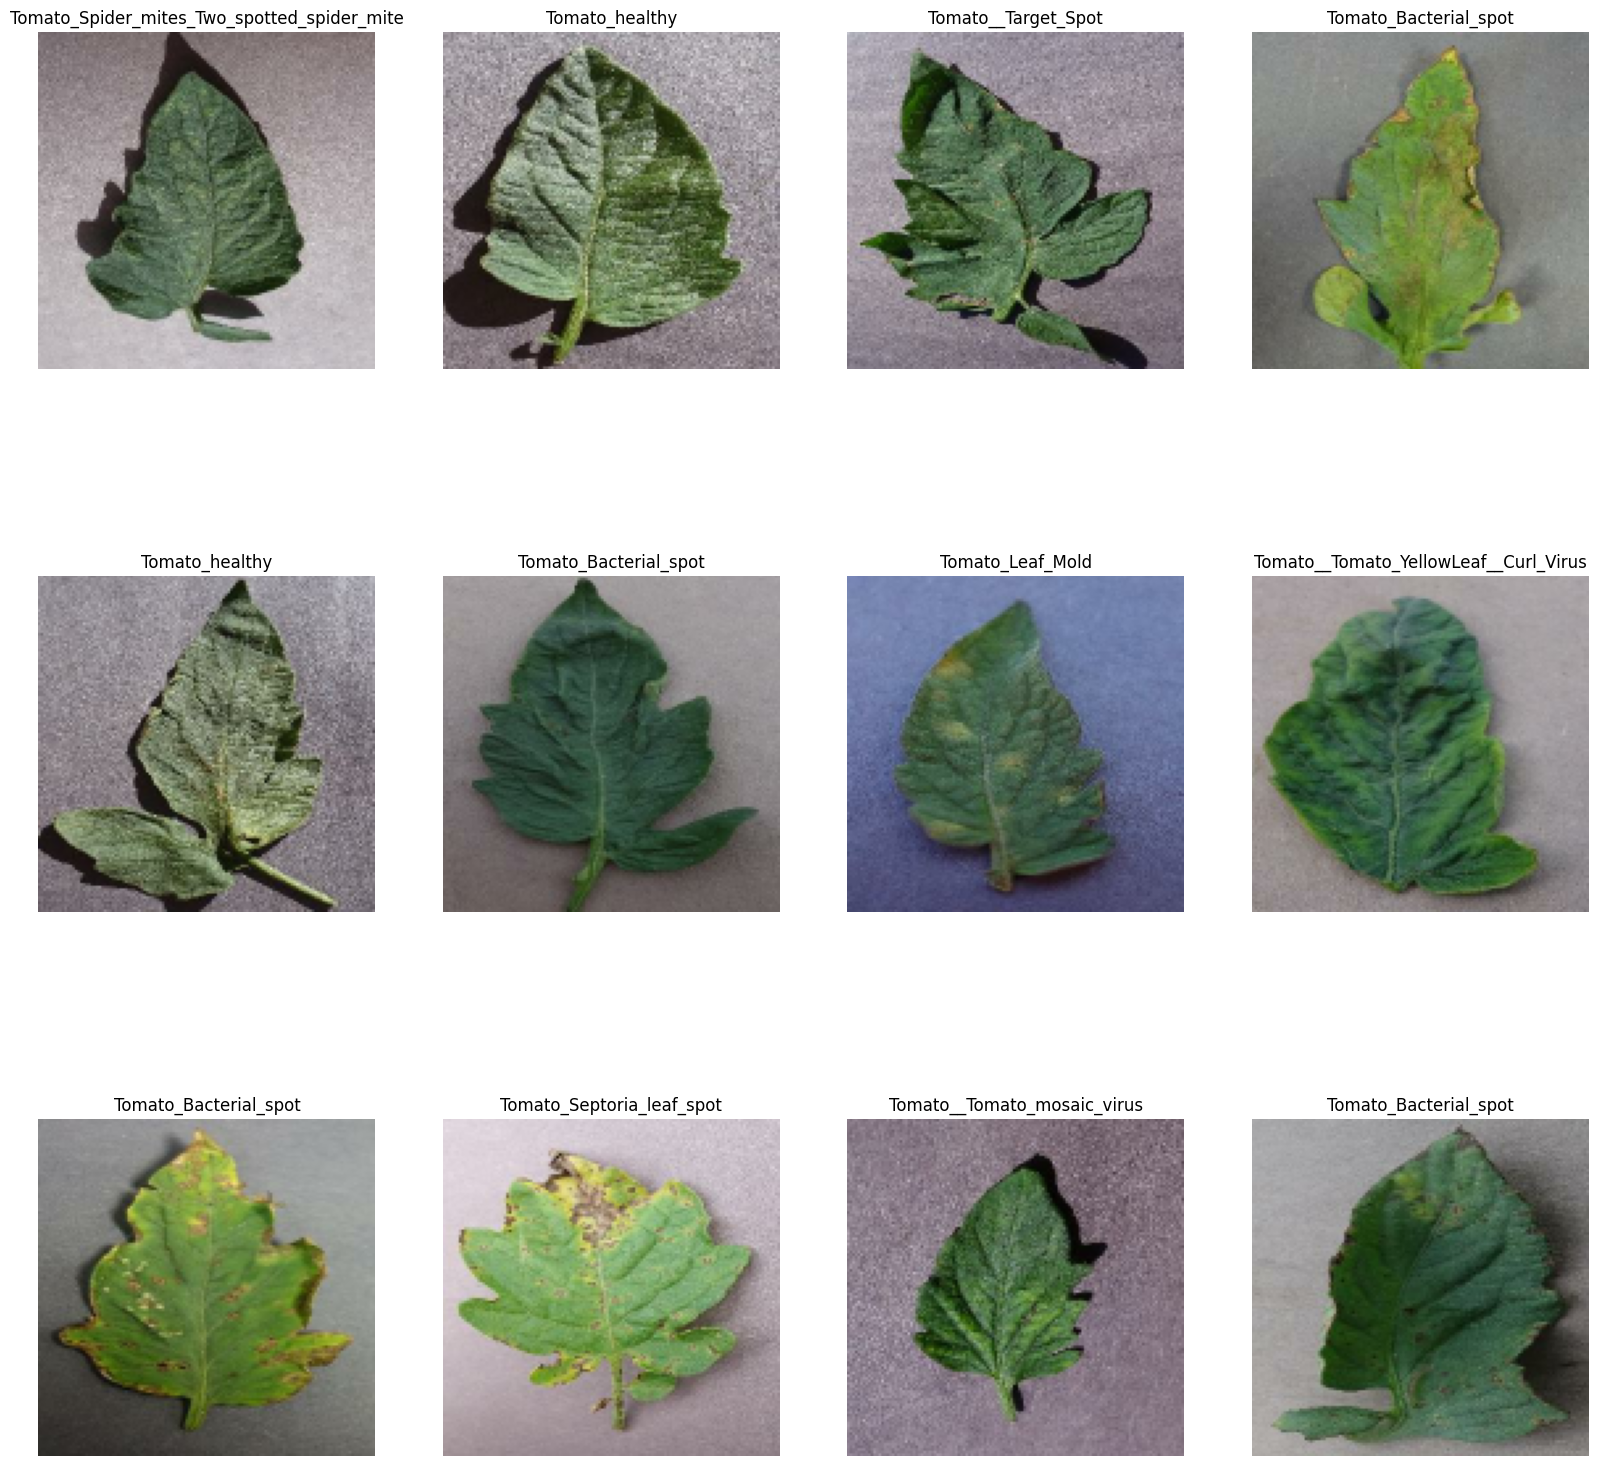

In [49]:
plt.figure(figsize=(20,20))
for image_batch,lable_batch in dataset.take(1):
     for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[lable_batch[i].numpy()])
        plt.axis('off')

In [50]:
# 80% ==> training
# 20% ==>(10%==>validation,10%==>test)

In [51]:
train_size=int(len(dataset)*0.8)
train_ds=dataset.take(train_size)
test_ds=dataset.skip(train_size)
len(train_ds)

130

In [52]:
len(test_ds)

33

In [53]:
val_size=int(len(dataset)*0.1)
val_ds=test_ds.take(val_size)
len(val_ds)

16

In [54]:
testf_ds=test_ds.skip(val_size)
len(testf_ds)

17

In [63]:
def partition_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    test_size=int(test_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(test_size)

    return train_ds,val_ds,test_ds

In [56]:
train_ds,val_ds,test_ds=partition_dataset(dataset)

In [57]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

130
16
17


In [58]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [59]:
resize_and_rescale = tf.keras.Sequential([
   tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
   tf.keras.layers.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])


In [60]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define your input shape
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

# Define the model
model = models.Sequential([
    tf.keras.layers.InputLayer(input_shape=input_shape[1:]),  
    resize_and_rescale,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 33s 230ms/step - accuracy: 0.1810 - loss: 2.1890 - val_accuracy: 0.5918 - val_loss: 1.2691
Epoch 2/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 26s 199ms/step - accuracy: 0.6245 - loss: 1.1046 - val_accuracy: 0.7402 - val_loss: 0.7153
Epoch 3/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 190ms/step - accuracy: 0.7502 - loss: 0.7334 - val_accuracy: 0.8184 - val_loss: 0.5655
Epoch 4/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.8416 - loss: 0.4697 - val_accuracy: 0.8164 - val_loss: 0.5113
Epoch 5/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 24s 181ms/step - accuracy: 0.8638 - loss: 0.4127 - val_accuracy: 0.8789 - val_loss: 0.3519
Epoch 6/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 23s 179ms/step - accuracy: 0.8917 - loss: 0.3123 - val_accuracy: 0.9141 - val_loss: 0.2618
Epoch 7/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.9362 - loss: 0.1801 - val_accuracy: 0.8926 - val_loss: 0.3071
Epoch 8/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 27s 206ms/step - accuracy: 0.9353 - loss: 0

In [64]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidance=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidance

In [67]:
model.save('tomato_model.keras')

In [68]:
scores=model.evaluate(test_ds)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9821 - loss: 0.1498


In [70]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

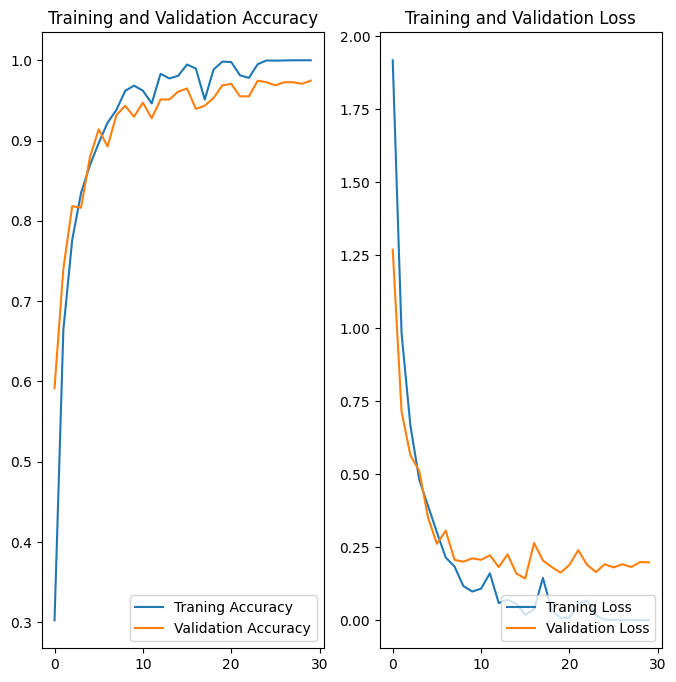

In [71]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCH),acc,label='Traning Accuracy')
plt.plot(range(EPOCH),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCH),loss,label='Traning Loss')
plt.plot(range(EPOCH),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

first img to predict
first image's actual label: Tomato_Bacterial_spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Tomato_Bacterial_spot


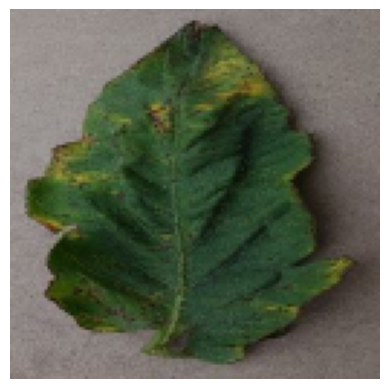

In [72]:
for image_batch,lable_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_lable=lable_batch[0].numpy()

    print("first img to predict")
    plt.axis('off')
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_lable])
    batch_prediction=model.predict(image_batch)
    index=(np.argmax(batch_prediction[0]))
    print(class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


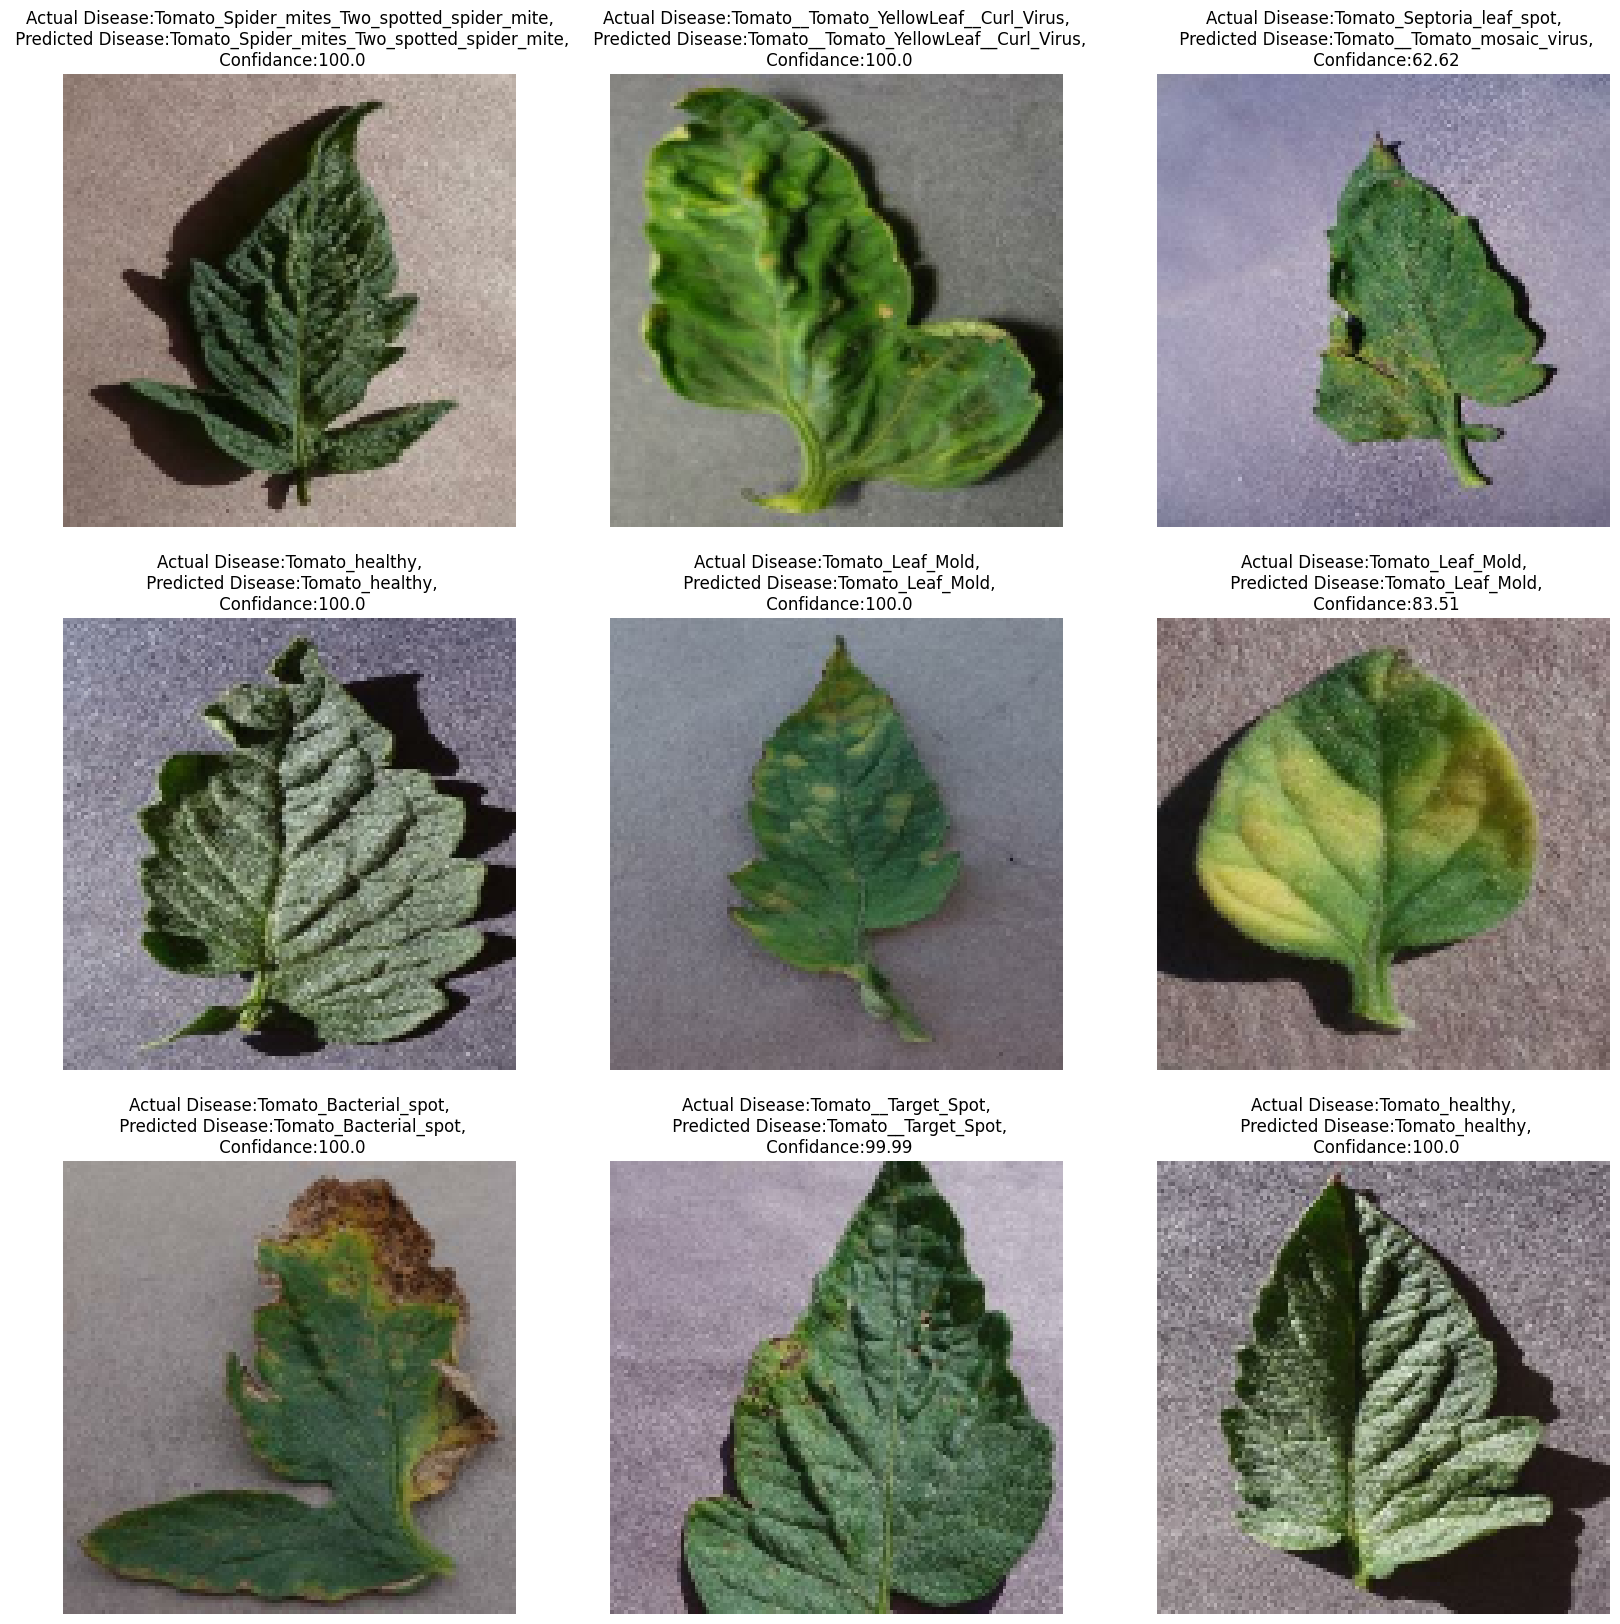

In [73]:
plt.figure(figsize=(20,20))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        actual_class=class_names[labels[i]]
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidance = predict(model,images[i])
        plt.title(f"Actual Disease:{actual_class},\n Predicted Disease:{predicted_class},\n Confidance:{confidance}")
        plt.axis('off')